# Dataset Information
Investors are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.

You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months.

# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [2]:

# !pip install fbprophet
# install visual c++ - visual studio
# if you face errors - use conda install

# Loading the dataset

In [3]:
df = pd.read_csv('C:/Users/LC/Desktop/Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


# Preprocessing the dataset

In [5]:
# check null values
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [7]:
# convert object to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


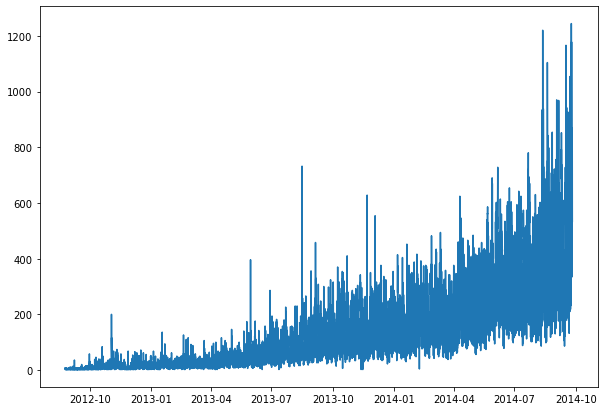

In [8]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'], df['Count'])
plt.show()

# Format data for the model

In [9]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [10]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


# Input Split

In [11]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [12]:
train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


In [13]:

test.head()

,y,ds
Datetime,,
2014-07-28,8546,2014-07-28
2014-07-29,8218,2014-07-29
2014-07-30,8498,2014-07-30
2014-07-31,8740,2014-07-31
2014-08-01,9186,2014-08-01


In [14]:

test.tail()

,y,ds
Datetime,,
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23
2014-09-24,16856,2014-09-24
2014-09-25,14152,2014-09-25


# Model Training

In [15]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [17]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-473.732066,-1737.029194,125.400840,-473.732066,-473.732066,-341.012799,-341.012799,-341.012799,-846.187838,-846.187838,-846.187838,505.175040,505.175040,505.175040,0.0,0.0,0.0,-814.744865
1,2012-08-26,-466.733663,-1880.828594,22.211822,-466.733663,-466.733663,-457.255955,-457.255955,-457.255955,-967.168356,-967.168356,-967.168356,509.912400,509.912400,509.912400,0.0,0.0,0.0,-923.989618
2,2012-08-27,-459.735259,-383.795589,1444.080974,-459.735259,-459.735259,944.458519,944.458519,944.458519,431.253528,431.253528,431.253528,513.204990,513.204990,513.204990,0.0,0.0,0.0,484.723259
3,2012-08-28,-452.736856,-430.028555,1493.748260,-452.736856,-452.736856,954.762245,954.762245,954.762245,439.591890,439.591890,439.591890,515.170355,515.170355,515.170355,0.0,0.0,0.0,502.025389
4,2012-08-29,-445.738452,-572.296317,1416.894141,-445.738452,-445.738452,915.693928,915.693928,915.693928,399.762294,399.762294,399.762294,515.931634,515.931634,515.931634,0.0,0.0,0.0,469.955476


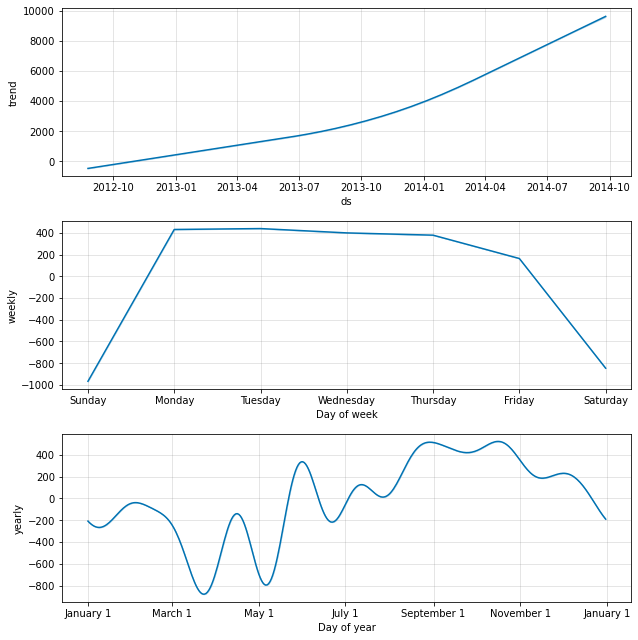

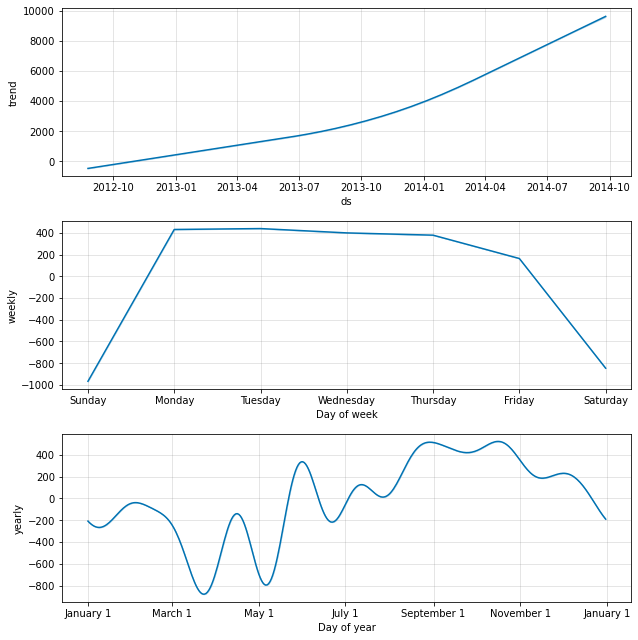

In [18]:
model.plot_components(forecast)

In [19]:
pred = forecast.iloc[-60:, :]
len(pred)

60

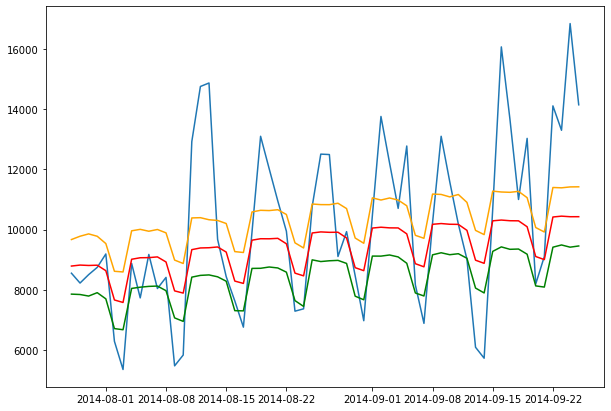

In [20]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

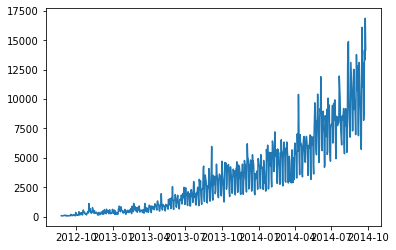

In [21]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

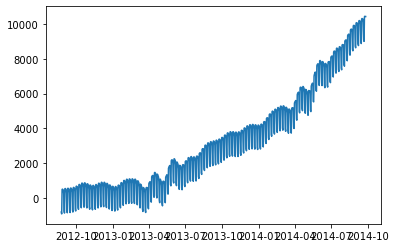

In [22]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [23]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-671.611865,-2271.075601,36.164824,-671.611865,-671.611865,-424.000456,-424.000456,-424.000456,-995.245768,-995.245768,-995.245768,571.245311,571.245311,571.245311,0.0,0.0,0.0,-1095.612321
1,2012-08-26,-663.572922,-2510.354710,48.694043,-663.572922,-663.572922,-582.367949,-582.367949,-582.367949,-1144.299997,-1144.299997,-1144.299997,561.932049,561.932049,561.932049,0.0,0.0,0.0,-1245.940871
2,2012-08-27,-655.533980,-825.480442,1512.685818,-655.533980,-655.533980,1007.348555,1007.348555,1007.348555,457.582428,457.582428,457.582428,549.766127,549.766127,549.766127,0.0,0.0,0.0,351.814576
3,2012-08-28,-647.495037,-744.761759,1696.619213,-647.495037,-647.495037,1143.949398,1143.949398,1143.949398,608.387591,608.387591,608.387591,535.561807,535.561807,535.561807,0.0,0.0,0.0,496.454361
4,2012-08-29,-639.456095,-714.708274,1582.549344,-639.456095,-639.456095,1077.093891,1077.093891,1077.093891,556.941854,556.941854,556.941854,520.152037,520.152037,520.152037,0.0,0.0,0.0,437.637796


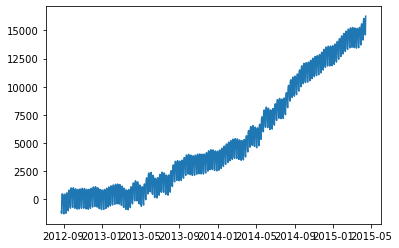

In [24]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()